In [19]:

import pandas as pd

# Cargar el dataset con los resultados categorizados
df = pd.read_excel("dataset_resultado_categorizado.xlsx")

# Codificar la variable objetivo (Evolucion Final) a valores numéricos
df["Evolucion Final encoded"] = df["Evolucion Final"].astype("category").cat.codes

# Guardar el mapeo para luego recuperar los nombres reales
label_mapping = dict(enumerate(df["Evolucion Final"].astype("category").cat.categories))
print("Clases codificadas:", label_mapping)


Clases codificadas: {0: 'IRC', 1: 'IRC, ERCA', 2: 'IRC, ERCA, Diálisis', 3: 'Muerte', 4: 'Nada'}


In [20]:
# Contar cuántas filas no tienen ningún NaN
completas = df.dropna()
print(f"Filas completas (sin valores faltantes): {len(completas)}")
print(f"Total de filas del dataset original: {len(df)}")


Filas completas (sin valores faltantes): 19
Total de filas del dataset original: 75


Se van a utilizar dos tecnicas generativas de generación de datos sintéticos.

In [21]:
# Revisar tipos de datos en tu DataFrame
tipos = df.dtypes.value_counts()
print("Resumen de tipos de columnas:\n", tipos)

# Listar columnas por tipo
columnas_float = df.select_dtypes(include=["float64"]).columns.tolist()
columnas_int = df.select_dtypes(include=["int64"]).columns.tolist()
columnas_obj = df.select_dtypes(include=["object"]).columns.tolist()

print(f"Float64: {len(columnas_float)} columnas")
print(f"Int64: {len(columnas_int)} columnas")
print(f"Object: {len(columnas_obj)} columnas")

Resumen de tipos de columnas:
 int64      62
float64    33
object      3
int8        1
Name: count, dtype: int64
Float64: 33 columnas
Int64: 62 columnas
Object: 3 columnas


In [22]:
import pandas as pd

# Cargar el dataset
df = pd.read_excel("dataset_resultado_categorizado.xlsx")

# Detectar columnas con ≤ 10 valores únicos → candidatas a categóricas
col_categoricas = df.nunique()
columnas_categoricas = col_categoricas[col_categoricas <= 10].index.tolist()

# Detectar columnas tipo object explícitamente categóricas
columnas_object = df.select_dtypes(include=["object"]).columns.tolist()

# El resto se consideran continuas (excluyendo object y categóricas explícitas)
todas_columnas = df.columns.tolist()
columnas_continuas = [col for col in todas_columnas if col not in columnas_categoricas + columnas_object]

# Resultados
print("Columnas categóricas detectadas:", len(columnas_categoricas))
print("Columnas continuas detectadas:", len(columnas_continuas))
print("\nEjemplo de categóricas:", columnas_categoricas[:10])
print("Ejemplo de continuas:", columnas_continuas[:10])

# Puedes guardarlas como listas si las necesitas para imputación, modelos, etc.
categ = columnas_categoricas
cont = columnas_continuas

df = df.drop(columns="Unnamed: 0")

# Guarda solo las columnas continuas en un nuevo Excel
df.to_excel("dataset_continuas_sin_unnamed.xlsx", index=False)


Columnas categóricas detectadas: 77
Columnas continuas detectadas: 21

Ejemplo de categóricas: ['Tipo_vasculitis', 'Sexo', 'Etnia', 'Hábito tabáquico', 'Consumo de alcohol', 'Consumo de cocaína', 'HTA', 'DM', 'DL', 'Enf cardiovascular']
Ejemplo de continuas: ['Unnamed: 0', 'PCR', 'Hemoglobina', 'Leucocitos', 'Plaquetas', 'Fosfatasa alcalina', 'GOT', 'GPT', 'LDH', 'Creatinina sérica']


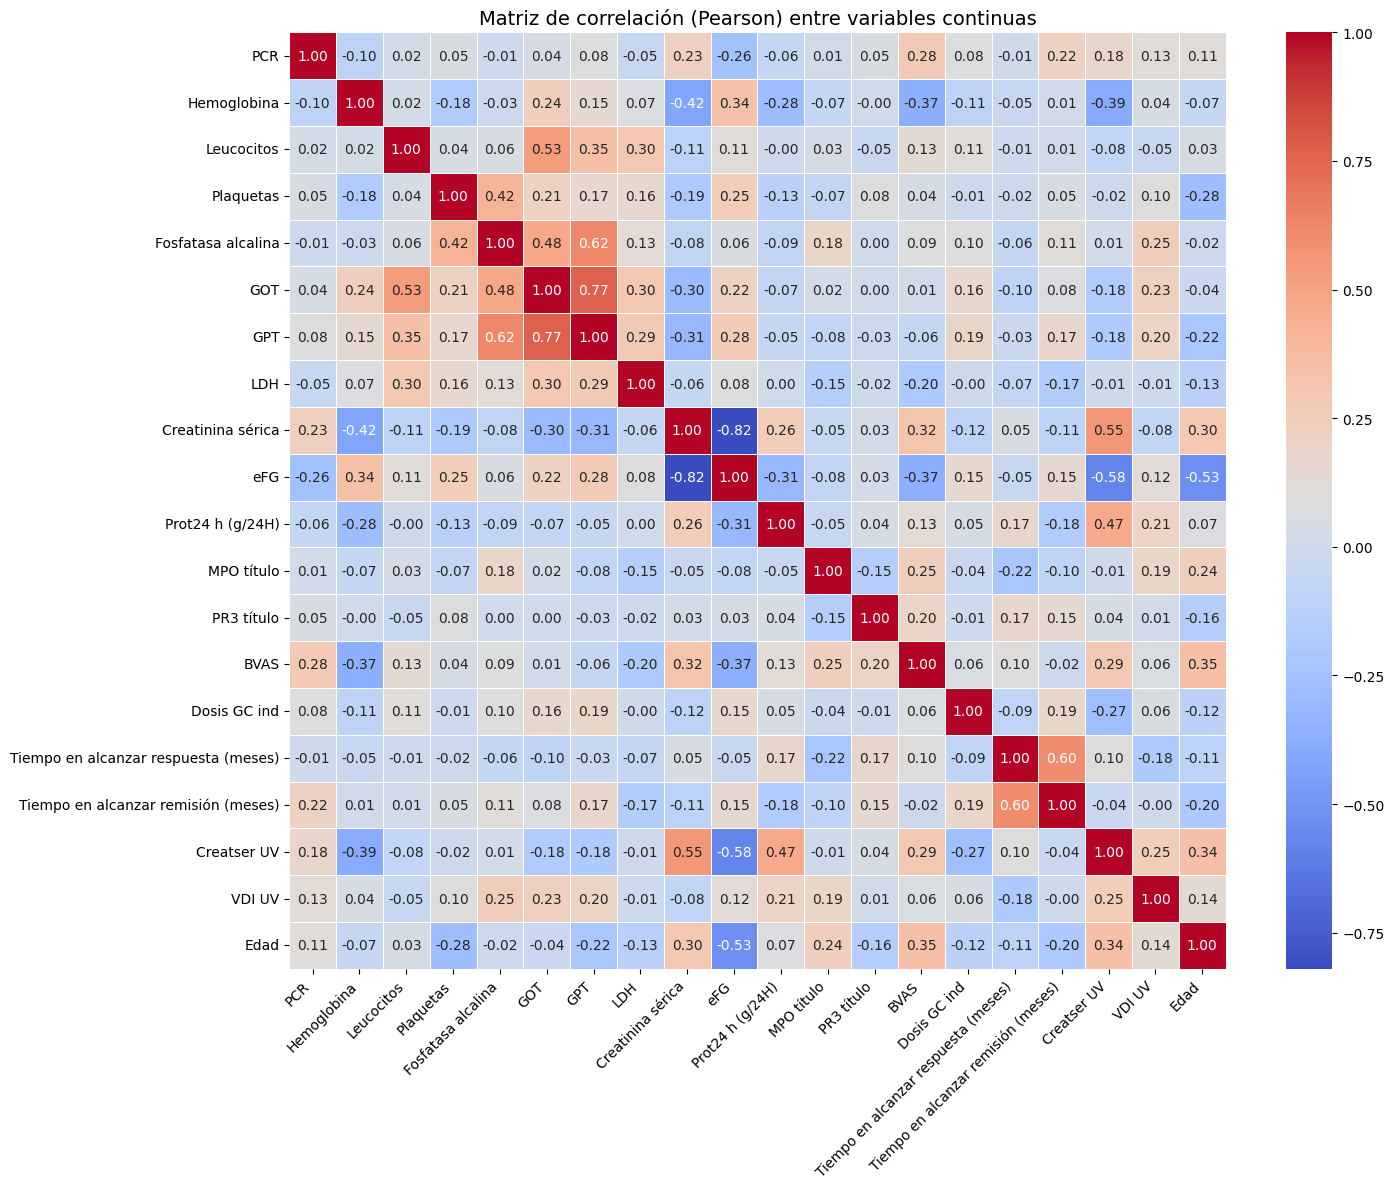

In [23]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_excel("dataset_resultado_categorizado.xlsx")

# Eliminar la columna índice si está presente
if "Unnamed: 0" in df.columns:
    df.drop(columns=["Unnamed: 0"], inplace=True)

# Definir columnas continuas (según el análisis anterior)
columnas_continuas = [
    'PCR', 'Hemoglobina', 'Leucocitos', 'Plaquetas', 'Fosfatasa alcalina',
    'GOT', 'GPT', 'LDH', 'Creatinina sérica', 'eFG',
    'Prot24 h (g/24H)', 'MPO título', 'PR3 título', 'BVAS',
    'Dosis GC ind', 'Tiempo en alcanzar respuesta (meses)',
    'Tiempo en alcanzar remisión (meses)', 'Creatser UV',
    'VDI UV', 'Edad'
]

# Calcular matriz de correlación
correlacion = df[columnas_continuas].corr(method="pearson")

# Mostrar como heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlacion, annot=True, cmap="coolwarm", fmt=".2f", square=True, linewidths=0.5)
plt.title("Matriz de correlación (Pearson) entre variables continuas", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [24]:
import pandas as pd

# 1. Cargar el archivo Excel
ruta = "dataset_continuas_sin_unnamed.xlsx"
df_cont = pd.read_excel(ruta)

# 2. Calcular el porcentaje de valores nulos por columna
null_percent = df_cont.isnull().mean().sort_values(ascending=False)

# 3. Mostrar las columnas ordenadas de más a menos nulos
print("Porcentaje de valores nulos por columna (ordenado):\n")
print(null_percent)

# 4. Si quieres ver solo las columnas con nulos
columnas_con_nulos = null_percent[null_percent > 0].index.tolist()
print("\nColumnas con valores nulos:", columnas_con_nulos)


Porcentaje de valores nulos por columna (ordenado):

Prot24 h (g/24H)                       0.280000
Tiempo en alcanzar remisión (meses)    0.226667
Respuesta 24m                          0.213333
VDI 24 m                               0.213333
Remisión 24 m                          0.200000
                                         ...   
Muerte                                 0.000000
Diálisis                               0.000000
Edad                                   0.000000
Resultado renal cat                    0.000000
Evolucion Final                        0.000000
Length: 97, dtype: float64

Columnas con valores nulos: ['Prot24 h (g/24H)', 'Tiempo en alcanzar remisión (meses)', 'Respuesta 24m', 'VDI 24 m', 'Remisión 24 m', 'MPO título', 'PR3 título', 'LDH', 'pANCA IFI', 'VDI 12 m', 'Respuesta 12 m', 'Remisión 12 m', 'Tiempo en alcanzar respuesta (meses)', 'cANCA IFI', 'Respuesta 6m', 'Dosis GC ind', 'Remisión 6m', 'MPO si/no', 'Fosfatasa alcalina', 'PR3 si/no', 'pANCA', 'VDI 

In [42]:
import pandas as pd

# 1. Cargar el dataset original
df = pd.read_excel("dataset_resultado_categorizado.xlsx")

# 2. Eliminar columna índice si existe
if "Unnamed: 0" in df.columns:
    df.drop(columns=["Unnamed: 0"], inplace=True)

# 3. Identificar columnas numéricas
columnas_numericas = df.select_dtypes(include=["float64", "int64"]).columns.tolist()

# 4. Detectar columnas numéricas que son en realidad categóricas (pocos valores únicos)
candidatas_categoricas = [col for col in columnas_numericas if df[col].nunique(dropna=True) <= 10]

# 5. El resto se consideran verdaderas continuas
columnas_continuas_reales = [col for col in columnas_numericas if col not in candidatas_categoricas]

# 6. Añadir columnas tipo object a las categóricas
columnas_object = df.select_dtypes(include=["object"]).columns.tolist()
columnas_categoricas_finales = columnas_object + candidatas_categoricas

# 7. Convertir columnas categóricas a string (requisito de CTGAN)
df[columnas_categoricas_finales] = df[columnas_categoricas_finales].astype(str)

# 8. Imputar medianas en columnas numéricas con menos del 50% de nulos
columnas_continuas_validas = [col for col in columnas_continuas_reales if df[col].isnull().mean() < 0.5]

for col in columnas_continuas_validas:
    mediana = df[col].median()
    df[col] = df[col].fillna(mediana)

# 9. Guardar listas por separado (opcional)
with open("columnas_categoricas.txt", "w") as f:
    f.write("\n".join(columnas_categoricas_finales))

with open("columnas_continuas.txt", "w") as f:
    f.write("\n".join(columnas_continuas_reales))

# 10. Guardar dataset listo para CTGAN
df.to_excel("dataset_CTGAN_final_imputado.xlsx", index=False)

# 11. Mensaje final
print("✅ Dataset procesado correctamente para CTGAN")
print(f"Categorical columns: {len(columnas_categoricas_finales)}")
print(f"Continuous columns (imputed): {len(columnas_continuas_validas)}")


✅ Dataset procesado correctamente para CTGAN
Categorical columns: 77
Continuous columns (imputed): 20


In [ ]:
# import pandas as pd
# from ctgan import CTGAN

# # 1. Cargar el dataset limpio y preparado
# df = pd.read_excel("dataset_CTGAN_final_imputado.xlsx")

# # 2. Definir columnas categóricas
# # (puedes cargarlo desde archivo si lo guardaste antes)
# with open("columnas_categoricas.txt", "r") as f:
#     columnas_categoricas = [line.strip() for line in f.readlines()]

# # 3. Instanciar el modelo CTGAN
# ctgan = CTGAN(epochs=300, batch_size=10, verbose=True)

# # 4. Entrenar el modelo
# ctgan.fit(df, discrete_columns=columnas_categoricas)

# # 5. Generar datos sintéticos (por ejemplo, 300 registros nuevos)
# datos_sinteticos = ctgan.sample(2000)

# # 6. Guardar los datos generados
# datos_sinteticos.to_excel("datos_sinteticos_generados_CTGAN.xlsx", index=False)

# print("✅ Datos sintéticos generados y guardados en 'datos_sinteticos_generados_CTGAN.xlsx'")


Gen. (-1.53) | Discrim. (-9.72): 100%|██████████| 300/300 [01:34<00:00,  3.17it/s]  


✅ Datos sintéticos generados y guardados en 'datos_sinteticos_generados_CTGAN.xlsx'


In [ ]:
import pandas as pd
from ctgan import CTGAN

# 1. Cargar datos originales
df = pd.read_excel("dataset_CTGAN_final_imputado.xlsx")

# 2. Leer columnas categóricas
with open("columnas_categoricas.txt", "r") as f:
    columnas_categoricas = [line.strip() for line in f.readlines()]

# 3. Entrenar modelo CTGAN
ctgan = CTGAN(epochs=400, batch_size=10, verbose=True)
ctgan.fit(df, discrete_columns=columnas_categoricas)

# 4. Generar 1000000 muestras
synthetic = ctgan.sample(1000000)

# 5. Eliminar cualquier fila con al menos un valor negativo
# Sólo se aplica a columnas numéricas
numeric_cols = synthetic.select_dtypes(include=["float64", "int64"]).columns
synthetic = synthetic[(synthetic[numeric_cols] >= 0).all(axis=1)]

# 6. Eliminar filas con NaN por seguridad (opcional)
synthetic = synthetic.dropna()

# 7. Guardar dataset limpio
synthetic.to_excel("datos_sinteticos_CTGAN_solo_positivos.xlsx", index=False)

print("✅ Dataset limpio con solo valores positivos guardado en 'datos_sinteticos_CTGAN_solo_positivos.xlsx'")


Gen. (-1.57) | Discrim. (-5.84): 100%|██████████| 400/400 [02:05<00:00,  3.20it/s]  


✅ Dataset limpio con solo valores positivos guardado en 'datos_sinteticos_CTGAN_solo_positivos.xlsx'
